<h1 style='text-align:center;border:10px double;border-color:gray;'>
    <br/>
     PROJET 4<br/>
    <br/>
    <font color = 'Navy'>"Anticipez les besoins en consommation de bâtiments"</font>
    <br/>
    <br/>
    
</h1>
<h4 style='text-align:left;border-color:gray;'>
    <br/>
    <font color = 'Navy'>* notebook de la prediction SEU</font>
    <br/>
</h4>

 Dirigé par :   [Pouria Forouzesh](https://www.linkedin.com/in/pouria-forouzesh/)

# Imports

In [1]:
from datetime import datetime

# Mesurer le temps d'exécution avant l'entraînement du modèle
start_time = datetime.now()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import set_config

In [4]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

C:\Users\pouri\AppData\Local\Temp\ipykernel_87372\339451792.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# I. Chargement jeu de données

In [5]:
data = pd.read_csv('data_final.csv')
df = data.copy()
print('Data shape = ', df.shape)
print('Data Nan = ', df.isna().sum().sum())


Data shape =  (1656, 19)
Data Nan =  0


In [6]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'BuildingAge', 'TotalGHGEmissionsLog', 'SiteEnergyUse(kBtu)Log'],
      dtype='object')

# II. Modeling et analyse la variable 'SiteEnergyUse(kBtu)'  à prédire

In [7]:
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)Log', 'TotalGHGEmissionsLog'], axis = 1)
y = df['SiteEnergyUse(kBtu)Log']
print(X.shape)
print(y.shape)

(1656, 15)
(1656,)


### Encoding et standardisation

In [8]:
X.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'BuildingAge'],
      dtype='object')

In [9]:
categorical_features = [feature for feature in X.columns if X[feature].dtypes == 'O' ] 
df_categorical_X = X[categorical_features]
df_categorical_X.head()

,BuildingType,PrimaryPropertyType,Neighborhood
0,NonResidential,Hotel,DOWNTOWN
1,NonResidential,Hotel,DOWNTOWN
2,NonResidential,Hotel,DOWNTOWN
3,NonResidential,Hotel,DOWNTOWN
4,NonResidential,Hotel,DOWNTOWN


In [10]:
# Instancier l'encodeur OneHotEncoder
encoder = OneHotEncoder()

# Transformer la colonne "Couleur" en plusieurs colonnes binaires
encoded_data_X = encoder.fit_transform(df_categorical_X)

# Convertir le résultat en un dataframe Pandas
df_encoded_X = pd.DataFrame(encoded_data_X.toarray(), columns=encoder.get_feature_names_out())

df_encoded_X.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
numeric_features = [feature for feature in X.columns if X[feature].dtypes != 'O' ] 
df_numeric_X = X[numeric_features]
df_numeric_X.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge
0,7,47.61220,-122.33799,1.0,12,88434,0,60.0,81.699997,2003882.00,1276453.0,89
1,7,47.61317,-122.33393,1.0,11,103566,15064,61.0,94.800003,0.00,5145082.0,20
2,7,47.61393,-122.33810,1.0,41,956110,196718,43.0,96.000000,21566554.00,1493800.0,47
3,7,47.61412,-122.33664,1.0,10,61320,0,56.0,110.800003,2214446.25,1811213.0,90
4,7,47.61375,-122.34047,1.0,18,175580,62000,75.0,114.800003,0.00,8803998.0,36


In [12]:
# Concaténer les dataframes 
df_X = pd.concat([df_numeric_X, df_encoded_X], axis=1)

print('data_encoded train', df_encoded_X.shape)
print('df_scaled train', df_numeric_X.shape)
print('data_encoded train + df_scaled train', df_X.shape)
print('Data Nan = ', df_X.isna().sum().sum())
df_X.head()

data_encoded train (1656, 40)
df_scaled train (1656, 12)
data_encoded train + df_scaled train (1656, 52)
Data Nan =  0


,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,7,47.61220,-122.33799,1.0,12,88434,0,60.0,81.699997,2003882.00,1276453.0,89,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,47.61317,-122.33393,1.0,11,103566,15064,61.0,94.800003,0.00,5145082.0,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,47.61393,-122.33810,1.0,41,956110,196718,43.0,96.000000,21566554.00,1493800.0,47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,47.61412,-122.33664,1.0,10,61320,0,56.0,110.800003,2214446.25,1811213.0,90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,47.61375,-122.34047,1.0,18,175580,62000,75.0,114.800003,0.00,8803998.0,36,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**📌Pour éviter les problèmes de fuite de données (Leakage), on crée d'abord nos dataframes de train et de test, puis on effectue le scaling.**

In [13]:
# Séparer les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (1324, 52)
Taille de l'ensemble de test : (332, 52)


**Train DataFrame**

In [14]:
# data numerique sauf la partie encoded
numeric_features = ['CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'BuildingAge' ] 

df_numeric_train = X_train[numeric_features]
df_numeric_train.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge
1406,4,47.66188,-122.31279,1.0,4,33910,0,75.0,62.799999,0.0,552710.0,63
741,1,47.56147,-122.38638,1.0,2,20700,0,86.5,206.100006,0.0,3444604.0,86
585,2,47.57903,-122.29982,1.0,1,50785,0,57.0,271.700012,0.0,3111684.0,53
1303,5,47.71620,-122.29560,1.0,1,25406,0,73.0,96.099998,0.0,540363.0,56
306,4,47.63349,-122.32634,1.0,3,158600,38400,19.0,125.599998,0.0,2368120.0,54


In [15]:
categorical_features = [feature for feature in X_train.columns if feature not in  numeric_features ] 
df_categorical_train = X_train[categorical_features]
df_categorical_train.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
1406,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
585,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**transformation les colonnes numériques avec StandardScaler() pour Train dataset**

In [16]:
# Sauvegarder les index du dataframe initial
index_train = df_numeric_train.index

# Créer une instance de StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données
scaler.fit(df_numeric_train)

# Mettre à l'échelle les colonnes numériques
df_scaled_train = pd.DataFrame(scaler.transform(df_numeric_train),
                         columns=df_numeric_train.columns,
                         index=index_train) # Réattribuer les index sauvegardés

# Afficher le nouveau dataframe
df_scaled_train.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge
1406,-0.163051,0.941853,0.817555,-0.06741,-0.014709,-0.264704,-0.301385,0.339075,-0.132466,-0.094255,-0.147476,0.252786
741,-1.532269,-1.127528,-2.188155,-0.06741,-0.323827,-0.305471,-0.301385,0.783585,1.825302,-0.094255,0.141541,0.960243
585,-1.075863,-0.765628,1.347302,-0.06741,-0.478387,-0.212625,-0.301385,-0.356679,2.721531,-0.094255,0.108269,-0.054804
1303,0.293355,2.061351,1.519664,-0.06741,-0.478387,-0.290948,-0.301385,0.261769,0.322479,-0.094255,-0.148710,0.037473
306,-0.163051,0.356755,0.264119,-0.06741,-0.169268,0.120105,0.605262,-1.825495,0.725509,-0.094255,0.033956,-0.024045


In [17]:
# Concaténer les dataframes 
X_train = pd.concat([df_scaled_train, df_categorical_train], axis=1)

print('data_encoded train', df_categorical_train.shape)
print('df_scaled train', df_scaled_train.shape)
print('data_encoded train + df_scaled train', X_train.shape)
print('Data Nan = ', X_train.isna().sum().sum())
X_train.head()

data_encoded train (1324, 40)
df_scaled train (1324, 12)
data_encoded train + df_scaled train (1324, 52)
Data Nan =  0


,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
1406,-0.163051,0.941853,0.817555,-0.06741,-0.014709,-0.264704,-0.301385,0.339075,-0.132466,-0.094255,-0.147476,0.252786,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
741,-1.532269,-1.127528,-2.188155,-0.06741,-0.323827,-0.305471,-0.301385,0.783585,1.825302,-0.094255,0.141541,0.960243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
585,-1.075863,-0.765628,1.347302,-0.06741,-0.478387,-0.212625,-0.301385,-0.356679,2.721531,-0.094255,0.108269,-0.054804,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1303,0.293355,2.061351,1.519664,-0.06741,-0.478387,-0.290948,-0.301385,0.261769,0.322479,-0.094255,-0.148710,0.037473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
306,-0.163051,0.356755,0.264119,-0.06741,-0.169268,0.120105,0.605262,-1.825495,0.725509,-0.094255,0.033956,-0.024045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Test DataFrame**

In [18]:
# data numerique sauf la partie encoded
numeric_features = ['CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'BuildingAge' ] 

df_numeric_test = X_test[numeric_features]
df_numeric_test.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge
1463,4,47.66272,-122.31798,1.0,2,32928,0,9.0,172.100006,0.0,0.0,17
413,5,47.70887,-122.33494,1.0,3,161789,91935,87.0,99.699997,0.0,16010.0,11
838,7,47.59979,-122.33339,1.0,4,27838,0,77.0,43.700001,0.0,0.0,114
490,7,47.63347,-122.34078,1.0,4,191146,94892,93.0,49.500000,0.0,0.0,16
1370,3,47.62048,-122.31386,1.0,1,44739,0,17.0,326.000000,0.0,6315500.0,18


In [19]:
categorical_features = [feature for feature in X_train.columns if feature not in  numeric_features ] 
df_categorical_test = X_test[categorical_features]
df_categorical_test.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
1463,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
838,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**transformation les colonnes numériques avec StandardScaler() pour Test dataset**

In [20]:
# Sauvegarder les index du dataframe initial
index_test = df_numeric_test.index

# # Créer une instance de StandardScaler
# scaler = StandardScaler()

# # Adapter le scaler aux données
# scaler.fit(df_numeric_test)

# Mettre à l'échelle les colonnes numériques
df_scaled_test = pd.DataFrame(scaler.transform(df_numeric_test),
                         columns=df_numeric_test.columns,
                         index=index_test) # Réattribuer les index sauvegardés

# Afficher le nouveau dataframe
df_scaled_test.head()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge
1463,-0.163051,0.959165,0.605575,-0.06741,-0.323827,-0.267734,-0.301385,-2.212026,1.360793,-0.094255,-0.202715,-1.162128
413,0.293355,1.910285,-0.087140,-0.06741,-0.169268,0.129947,1.869256,0.802912,0.371663,-0.094255,-0.201115,-1.346682
838,1.206167,-0.337779,-0.023831,-0.06741,-0.014709,-0.283443,-0.301385,0.416381,-0.393411,-0.094255,-0.202715,1.821495
490,1.206167,0.356343,-0.325669,-0.06741,-0.014709,0.220546,1.939072,1.034830,-0.314171,-0.094255,-0.202715,-1.192887
1370,-0.619457,0.088628,0.773852,-0.06741,-0.478387,-0.231284,-0.301385,-1.902801,3.463379,-0.094255,0.428459,-1.131369


In [21]:
# Concaténer les dataframes 
X_test = pd.concat([df_scaled_test, df_categorical_test], axis=1)

print('data_encoded train', df_categorical_test.shape)
print('df_scaled train', df_scaled_test.shape)
print('data_encoded train + df_scaled train', X_test.shape)
print('Data Nan = ', X_test.isna().sum().sum())
X_test.head()

data_encoded train (332, 40)
df_scaled train (332, 12)
data_encoded train + df_scaled train (332, 52)
Data Nan =  0


,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SteamUse(kBtu),NaturalGas(kBtu),BuildingAge,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
1463,-0.163051,0.959165,0.605575,-0.06741,-0.323827,-0.267734,-0.301385,-2.212026,1.360793,-0.094255,-0.202715,-1.162128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
413,0.293355,1.910285,-0.087140,-0.06741,-0.169268,0.129947,1.869256,0.802912,0.371663,-0.094255,-0.201115,-1.346682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
838,1.206167,-0.337779,-0.023831,-0.06741,-0.014709,-0.283443,-0.301385,0.416381,-0.393411,-0.094255,-0.202715,1.821495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,1.206167,0.356343,-0.325669,-0.06741,-0.014709,0.220546,1.939072,1.034830,-0.314171,-0.094255,-0.202715,-1.192887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1370,-0.619457,0.088628,0.773852,-0.06741,-0.478387,-0.231284,-0.301385,-1.902801,3.463379,-0.094255,0.428459,-1.131369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
models = {
    'Dummy Regressor' : DummyRegressor(strategy="median"),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(tol=0.5),
    'DecisionTree' : DecisionTreeRegressor(random_state=42),
    'ElasticNet' : ElasticNet(),
    'SVR': SVR(),
    'Ridge Kernel' : KernelRidge(),
    'RandomForestRegressor' : RandomForestRegressor(random_state=42),
    'XGBRegressor' : XGBRegressor()
}

In [23]:
results_model = []
#parametres = []
for model_name, model in models.items():
        
    # Fit models
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluer les performances du modèles avec les métriques
    print(f"Evaluer la performance {model_name}...")
    mae = mean_absolute_error(y_test, y_pred).round(3)
    mse = mean_squared_error(y_test, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(3)
    med_abs_err = median_absolute_error(y_test,y_pred).round(3)
    print("MAE = ", mae)        
    print("MSE = ", mse)
    print("RMSE = ",rmse)
    print("R² = ", r_score)
    print("median abs err = ", med_abs_err)
    print('-'*100)
    # Score model et  append model results dict avec valeurs
    results_model.append([model_name, mae, mse, rmse, r_score, med_abs_err])

Evaluer la performance Dummy Regressor...
MAE =  0.46
MSE =  0.338
RMSE =  0.581
R² =  -0.03
median abs err =  0.38
----------------------------------------------------------------------------------------------------
Evaluer la performance Ridge...
MAE =  0.228
MSE =  0.086
RMSE =  0.293
R² =  0.737
median abs err =  0.186
----------------------------------------------------------------------------------------------------
Evaluer la performance Lasso...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
----------------------------------------------------------------------------------------------------
Evaluer la performance DecisionTree...
MAE =  0.095
MSE =  0.02
RMSE =  0.141
R² =  0.938
median abs err =  0.067
----------------------------------------------------------------------------------------------------
Evaluer la performance ElasticNet...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
-----------------------------------

In [24]:
model_score_eval = pd.DataFrame(results_model,columns=['model', 'MAE', 'MSE', 'RMSE', 'R²', 'median abs err']).set_index('model')
model_score_eval

,MAE,MSE,RMSE,R²,median abs err
model,,,,,
Dummy Regressor,0.460,0.338,0.581,-0.030,0.380
Ridge,0.228,0.086,0.293,0.737,0.186
Lasso,0.458,0.328,0.573,-0.001,0.367
DecisionTree,0.095,0.020,0.141,0.938,0.067
ElasticNet,0.458,0.328,0.573,-0.001,0.367
SVR,0.136,0.033,0.182,0.901,0.109
Ridge Kernel,0.230,0.090,0.300,0.726,0.193
RandomForestRegressor,0.065,0.012,0.110,0.964,0.040
XGBRegressor,0.067,0.011,0.105,0.966,0.045


## Recherche des hyperparamètres avec GridSearchCV

**Modèle Baseline : Régression linéaire multivariée**

On crée un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu'ils améliore les prédictions. Pour cette baseline, nous utiliserons une régression linéaire multivariée.

In [25]:
results_gridSearch = []

parameters_MLR = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, -1],
    'positive': [True, False]
}

MLR_gridSearch = GridSearchCV(LinearRegression(), parameters_MLR, cv=5, n_jobs = 5)

MLR_gridSearch.fit(X_train, y_train) #.values.ravel()
y_pred_MLR = MLR_gridSearch.predict(X_test)

print('Best score et params LinearRegression')
print ("best score: ", MLR_gridSearch.best_score_)
print("best params: ",MLR_gridSearch.best_params_)
print('mean_fit_time :', MLR_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', MLR_gridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , MLR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',MLR_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction LinearRegression:")
mae = mean_absolute_error(y_test,y_pred_MLR).round(3)
mse = mean_squared_error(y_test,y_pred_MLR).round(3)
r_score = r2_score(y_test, y_pred_MLR, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_MLR)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_MLR).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['LinearRegression',
                          MLR_gridSearch.best_score_,
                          MLR_gridSearch.best_params_,
                          MLR_gridSearch.cv_results_['mean_test_score'],
                          MLR_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])


Best score et params LinearRegression
best score:  0.2396789607746776
best params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}
mean_fit_time : [0.01849113 0.00921922 0.01019907 0.00719924 0.01049566 0.00715184
 0.00868444 0.00599966 0.00895061 0.00521331 0.00887027 0.00465198
 0.00946693 0.00620542 0.00942283 0.00624499 0.00927639 0.00595174
 0.00921745 0.00549765 0.01066713 0.0069561  0.0084177  0.00553341
 0.00912442 0.00499716 0.00933185 0.00539846 0.00939822 0.00605655
 0.00937347 0.00540667]
mean_score_time : [0.00247226 0.00248756 0.00280199 0.00220208 0.00274963 0.00220232
 0.00260253 0.0021997  0.00321221 0.00200157 0.00261021 0.00239792
 0.00239978 0.00220609 0.00262074 0.00199971 0.00200839 0.0022018
 0.00242887 0.00206752 0.00211787 0.00262823 0.00283337 0.00279946
 0.00243182 0.00261979 0.00200129 0.00200276 0.00279546 0.00265527
 0.00239911 0.0020092 ]
mean_test_score : [ 2.04504183e-01 -3.75834785e+20  2.04402901e-01  2.396

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


**Hyperparamètres pour le modèle Ridge**

In [26]:
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
parameters_Ridge = {
    'alpha': [0.1, 1, 10],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky'],
    'max_iter': [100, 500, 1000],
    'tol': [0.001, 0.01, 0.1]
}

Ridge_gridSearch = GridSearchCV(Ridge(),parameters_Ridge, cv=5, n_jobs = 5)

Ridge_gridSearch.fit(X_train, y_train.values.ravel())
y_pred_Ridge = Ridge_gridSearch.predict(X_test)

print('Best score et params Ridge')
print ("best score: ", Ridge_gridSearch.best_score_)
print("best params: ",Ridge_gridSearch.best_params_)
print('mean_fit_time :', Ridge_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', Ridge_gridSearch.cv_results_['mean_score_time'])
print('mean_test_score :',Ridge_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction Ridge:")
mae = mean_absolute_error(y_test,y_pred_Ridge).round(3)
mse = mean_squared_error(y_test,y_pred_Ridge).round(3)
r_score = r2_score(y_test, y_pred_Ridge, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_Ridge)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_Ridge).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['Ridge',
                          Ridge_gridSearch.best_score_,
                          Ridge_gridSearch.best_params_,
                          Ridge_gridSearch.cv_results_['mean_test_score'],
                          Ridge_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])

Best score et params Ridge
best score:  0.5102932060686654
best params:  {'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'normalize': True, 'solver': 'auto', 'tol': 0.001}
mean_fit_time : [0.00700059 0.00999718 0.01138639 0.01149526 0.01086302 0.01719813
 0.00565    0.00747094 0.00516415 0.00535779 0.00387893 0.00550761
 0.00699687 0.00654192 0.006212   0.0038033  0.00370536 0.00470324
 0.00450077 0.00506644 0.00499001 0.0062233  0.00768514 0.00762501
 0.00441403 0.00509949 0.00468774 0.00436573 0.00478339 0.00399942
 0.00525899 0.0057302  0.005832   0.00420728 0.00390449 0.00457025
 0.00466547 0.00400047 0.00468893 0.0063653  0.00697684 0.00688457
 0.00590377 0.00491509 0.00469217 0.00406666 0.00438161 0.00459991
 0.00499949 0.0051044  0.00459476 0.00280042 0.00360198 0.00339804
 0.00319986 0.00360088 0.00304952 0.00500193 0.0055038  0.00573149
 0.00359888 0.00259976 0.00330667 0.00280051 0.00339899 0.00367012
 0.00429978 0.00459867 0.00410447 0.00319777 0.00240002 0.00264583
 0.

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


**Hyperparamètres pour le modèle Lasso**

In [27]:
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
parameters_Lasso = {
    'alpha': [0.1, 1, 10],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'tol': [0.001, 0.01, 0.1],
    'selection': ['cyclic', 'random']
}
Lasso_gridSearch = GridSearchCV(Lasso(tol=0.5),parameters_Lasso, cv=5, n_jobs = 5)
Lasso_gridSearch.fit(X_train, y_train)
y_pred_Lasso = Lasso_gridSearch.predict(X_test)
print('Best score et params Lasso')
print ("best score: ", Lasso_gridSearch.best_score_)
print("best params: ",Lasso_gridSearch.best_params_)
print('mean_fit_time :', Lasso_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', Lasso_gridSearch.cv_results_['mean_score_time'])
print('mean_test_score :',Lasso_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction Lasso:")
mae = mean_absolute_error(y_test,y_pred_Lasso).round(3)
mse = mean_squared_error(y_test,y_pred_Lasso).round(3)
r_score = r2_score(y_test, y_pred_Lasso, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_Lasso)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_Lasso).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['Lasso',
                          Lasso_gridSearch.best_score_,
                          Lasso_gridSearch.best_params_,
                          Lasso_gridSearch.cv_results_['mean_test_score'],
                          Lasso_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])

Best score et params Lasso
best score:  0.4360345393762005
best params:  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'selection': 'cyclic', 'tol': 0.1}
mean_fit_time : [0.00794401 0.01015525 0.00641079 0.00559115 0.00659518 0.0069953
 0.00597353 0.01470766 0.00843525 0.01923933 0.01433201 0.00693994
 0.00449605 0.00436268 0.00481281 0.00467238 0.00391283 0.00501513
 0.00360293 0.00445948 0.00401068 0.00440383 0.00422101 0.00838852
 0.0086184  0.00466814 0.00930629 0.00991883 0.00900216 0.00491924
 0.00449152 0.00364537 0.00365009 0.00433693 0.00340123 0.00315008
 0.00408893 0.00300179 0.00315237 0.00419884 0.00364466 0.00325222
 0.00379863 0.00324526 0.00305161 0.0044034  0.00360112 0.00386987
 0.00406313 0.0050694  0.0044631  0.00774851 0.00472312 0.00636868
 0.00861139 0.00376167 0.00306368 0.01094899 0.0043694  0.00353427
 0.00350275 0.0066443  0.00641136 0.00397444 0.00419111 0.00440178
 0.00419979 0.004603   0.00424914 0.00429378 0.00385242 0.0040001

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


**Hyperparamètres pour le modèle ElasticNet**

In [28]:
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
l1_ratio = np.logspace(-5, 1, n_alphas)
parameters_eNet = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.25, 0.5, 0.75],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'tol': [0.001, 0.01, 0.1],
    'selection': ['cyclic', 'random']
}


eNet_gridSearch = GridSearchCV(ElasticNet(max_iter=10000,tol=100),parameters_eNet, cv=5, n_jobs = 5)
eNet_gridSearch.fit(X_train, y_train)
y_pred_eNet = eNet_gridSearch.predict(X_test)

print('Best score et params ElasticNet')
print ("best score: ", eNet_gridSearch.best_score_)
print("best params: ",eNet_gridSearch.best_params_)
print('mean_fit_time :', eNet_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', eNet_gridSearch.cv_results_['mean_score_time'])
print('mean_test_score :',eNet_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction ElasticNet:")
mae = mean_absolute_error(y_test,y_pred_eNet).round(3)
mse = mean_squared_error(y_test,y_pred_eNet).round(3)
r_score = r2_score(y_test, y_pred_eNet, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_eNet)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_eNet).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['ElasticNet',
                          eNet_gridSearch.best_score_,
                          eNet_gridSearch.best_params_,
                          eNet_gridSearch.cv_results_['mean_test_score'],
                          eNet_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])


Best score et params ElasticNet
best score:  0.513049507811114
best params:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 1000, 'normalize': False, 'selection': 'random', 'tol': 0.1}
mean_fit_time : [0.00815654 0.0073565  0.00884018 0.00708261 0.00703678 0.00809054
 0.00629168 0.01029115 0.00600004 0.020192   0.00560246 0.00851259
 0.00574455 0.00496697 0.00474353 0.0050034  0.00506706 0.00546856
 0.00554872 0.00442305 0.00468693 0.00471864 0.00438476 0.00449595
 0.00534492 0.00454512 0.00509844 0.00622478 0.00488954 0.00618348
 0.00558929 0.0042861  0.00402398 0.00521445 0.00434051 0.00405927
 0.00486617 0.00469356 0.00424323 0.00479097 0.00484142 0.00450249
 0.00475535 0.00403233 0.00332093 0.00464449 0.00365143 0.00360699
 0.00368247 0.00455503 0.00424657 0.00426455 0.00418415 0.00471811
 0.00386748 0.00358624 0.00324731 0.00400486 0.00423341 0.00328584
 0.00486493 0.00454111 0.00505257 0.00535932 0.00787745 0.00548449
 0.00407186 0.0045146  0.00476408 0.00441

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


**Hyperparamètres pour le modèle SVR**

In [29]:
parameters_SVM = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                 'degree': [2, 3, 4, 5],
                 'C': [0.1, 1, 10, 100],
                 'epsilon': [0.1, 0.2, 0.3, 0.4],
                 'gamma': ['scale', 'auto']}

SVM_gridSearch = GridSearchCV(SVR(), parameters_SVM, cv=5, n_jobs=5)

SVM_gridSearch.fit(X_train, y_train.values.ravel())
y_pred_SVM = SVM_gridSearch.predict(X_test)

print('Best score et params SVM')
print("best score: ", SVM_gridSearch.best_score_)
print("best params: ", SVM_gridSearch.best_params_)
print('mean_fit_time :', SVM_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', SVM_gridSearch.cv_results_['mean_score_time'])
print('mean_test_score :', SVM_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction SVM:")
mae = mean_absolute_error(y_test,y_pred_SVM).round(3)
mse = mean_squared_error(y_test,y_pred_SVM).round(3)
r_score = r2_score(y_test, y_pred_SVM, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_SVM)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_SVM).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['SVM',
                          SVM_gridSearch.best_score_,
                          SVM_gridSearch.best_params_,
                          SVM_gridSearch.cv_results_['mean_test_score'],
                          SVM_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])


Best score et params SVM
best score:  0.8519664068903404
best params:  {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
mean_fit_time : [1.00024557e-01 7.21963406e-02 6.75510406e-02 8.03203106e-02
 8.81329060e-02 6.15348339e-02 6.62810802e-02 7.26662636e-02
 6.34846210e-02 5.12401104e-02 3.85975361e-02 6.72800064e-02
 6.47672176e-02 5.24651527e-02 4.18040276e-02 4.96246338e-02
 5.07082939e-02 3.65784168e-02 2.57813454e-02 5.03990173e-02
 4.32529926e-02 4.22563076e-02 2.90342808e-02 3.79388332e-02
 3.93338680e-02 3.16526890e-02 1.96718693e-02 3.84107113e-02
 3.60463142e-02 3.58945847e-02 2.28172302e-02 3.14436913e-02
 1.00988770e-01 8.46646309e-02 7.00327873e-02 9.64426041e-02
 1.00022697e-01 7.67173767e-02 7.52107143e-02 8.10078621e-02
 8.19299221e-02 7.54847527e-02 5.38390636e-02 8.06277275e-02
 7.50810146e-02 5.97002029e-02 4.62960243e-02 5.36870956e-02
 5.12921333e-02 5.10792732e-02 3.07612419e-02 5.42371273e-02
 5.02891541e-02 4.68146324e-02 3.09232712e-02 

**Hyperparamètres pour le modèle decision tree**

In [30]:
parameters_DTR = {'criterion': ['mse', 'friedman_mse', 'mae'],
                 'splitter': ['best', 'random'],
                 'max_depth': [2, 4, 6, 8, 10, 12],
                 'min_samples_split': [2, 5, 10, 15],
                 'min_samples_leaf': [1, 2, 5, 10],
                 'max_features': ['auto', 'sqrt', 'log2']}

DTR_gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=42), parameters_DTR, cv=5, n_jobs = 5)

DTR_gridSearch.fit(X_train, y_train.values.ravel())
y_pred_DTR = DTR_gridSearch.predict(X_test)

print('Best score et params DecisionTree')
print ("best score: ", DTR_gridSearch.best_score_)
print("best params: ",DTR_gridSearch.best_params_)
print('mean_fit_time :', DTR_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', DTR_gridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , DTR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',DTR_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction DecisionTree:")
mae = mean_absolute_error(y_test,y_pred_DTR).round(3)
mse = mean_squared_error(y_test,y_pred_DTR).round(3)
r_score = r2_score(y_test, y_pred_DTR, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_DTR)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_DTR).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['DecisionTree',
                          DTR_gridSearch.best_score_,
                          DTR_gridSearch.best_params_,
                          DTR_gridSearch.cv_results_['mean_test_score'],
                          DTR_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\pouri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


Best score et params DecisionTree
best score:  0.9124540976629401
best params:  {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
mean_fit_time : [0.00835648 0.00540285 0.00641603 ... 0.02868648 0.03288488 0.02826514]
mean_score_time : [0.00282512 0.00273347 0.00276785 ... 0.00290833 0.00241532 0.00210471]
mean_test_score : [0.57494267 0.24417457 0.57494267 ... 0.27439733 0.53410876 0.27439733]
--------------------------------------------------
score de la prédiction DecisionTree:
MAE =  0.094
MSE =  0.02
RMSE =  0.14
R² =  0.94
median abs err =  0.066


**Hyperparamètres pour le modèle random forest**

In [31]:
# Recherche de la meilleure configuration d'hyperparamètre
parameters_RFR = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['auto', 'sqrt', 'log2']}

RFR_gridSearch = GridSearchCV(RandomForestRegressor(), parameters_RFR, cv=5, n_jobs = 5)

RFR_gridSearch.fit(X_train, y_train.values.ravel())
y_pred_RFR = RFR_gridSearch.predict(X_test)

print('Best score et params RandomForestRegressor')
print ("best score: ", RFR_gridSearch.best_score_)
print("best params: ",RFR_gridSearch.best_params_)
print('mean_fit_time :', RFR_gridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', RFR_gridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , RFR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',RFR_gridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:")
mae = mean_absolute_error(y_test,y_pred_RFR).round(3)
mse = mean_squared_error(y_test,y_pred_RFR).round(3)
r_score = r2_score(y_test, y_pred_RFR, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_RFR)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_RFR).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['RandomForestRegressor',
                          RFR_gridSearch.best_score_,
                          RFR_gridSearch.best_params_,
                          RFR_gridSearch.cv_results_['mean_test_score'],
                          RFR_gridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err])



C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best score et params RandomForestRegressor
best score:  0.9251016464830262
best params:  {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
mean_fit_time : [0.87577581 1.87897863 3.12203054 0.81705685 1.58277259 2.27753911
 0.65905237 1.34699407 2.02540288 0.77634258 1.59607825 2.41800761
 0.75779591 1.53670068 2.49913721 0.74348354 1.41471648 2.07139139
 0.65806651 1.33404636 1.84088197 0.67100081 1.26814661 1.82866702
 0.604002   1.32988677 1.8139348  0.39834747 0.93779078 1.71226954
 0.65188274 0.94642653 1.6019681  0.51789804 0.85094895 1.27647347
 0.41104212 1.01632919 1.43691525 0.41404443 1.14468379 1.37335944
 0.39009657 0.7301466  1.15718598 0.33659286 0.60970016 0.9765285
 0.38476343 0.77476707 1.27834005 0.40074368 0.85485759 1.413415
 0.61012554 1.17237592 1.35620856 0.37711492 0.79145937 1.16850805
 0.32591553 0.72426343 1.02013898 0.37281828 0.74107785 1.09379153
 0.35291591 0.74568467 1.10432215 0.35486579 0.7279

**Hyperparamètres pour le modèle xgboost**

In [32]:
parameters_XGB= {'learning_rate': [0.01, 0.1, 0.5, 1],
                  'max_depth': [3, 5, 7, 10],
                  'n_estimators': [100, 200, 300],
                  'min_child_weight': [1, 3, 5],
                  'gamma': [0, 0.1, 0.5, 1]}

XGB_GridSearch = GridSearchCV(XGBRegressor(),parameters_XGB, cv=5, n_jobs = 5)
XGB_GridSearch.fit(X_train, y_train)
y_pred_XGB = XGB_GridSearch.predict(X_test)
           

mae = mean_absolute_error(y_test,y_pred_XGB).round(3)
mse = mean_squared_error(y_test,y_pred_XGB).round(3)
r_score = r2_score(y_test, y_pred_XGB, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_XGB)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_XGB).round(3)
print('Best score et params XGBRegressor ')
print ("best score: ", XGB_GridSearch.best_score_)
print("best params: ",XGB_GridSearch.best_params_)
print('mean_fit_time :', XGB_GridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', XGB_GridSearch.cv_results_['mean_score_time'])
#print('mean_train_score :' , XGB_GridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',XGB_GridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:"),
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch.append(['XGBRegressor',
                          XGB_GridSearch.best_score_,
                          XGB_GridSearch.best_params_,
                          XGB_GridSearch.cv_results_['mean_test_score'],
                          XGB_GridSearch.cv_results_['mean_score_time'],
                          mae, mse, rmse, r_score, med_abs_err ])


Best score et params XGBRegressor 
best score:  0.9539666412483381
best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
mean_fit_time : [0.26413193 0.49080286 0.75094056 0.25629911 0.50229654 0.74806433
 0.25255084 0.50420985 0.79975142 0.35312371 0.79464488 1.08387461
 0.34043493 0.73909349 1.20640697 0.36105151 0.84818902 1.19713402
 0.39044948 0.89732103 1.3296495  0.34310913 0.76805887 1.41734538
 0.50522928 1.06193433 1.73925462 0.43896875 0.95967827 1.73735986
 0.37511806 1.03691592 1.4133184  0.31378732 0.76375799 1.29968939
 0.28092928 0.58550858 0.85219531 0.297227   0.55023003 0.82864213
 0.27902131 0.54657574 0.7768086  0.41047029 0.8349524  1.34605823
 0.42356372 0.85858545 1.32230945 0.44135637 0.87585759 1.30209055
 0.55915089 1.11757832 1.85007424 0.66183429 1.18614388 1.77972083
 0.51748972 1.09914389 1.58756504 0.6974134  1.50779924 1.94064531
 0.67787886 1.52772098 2.23941083 0.65220442 1.47127328 2.32546406
 0.2

In [33]:
Model_result_gridSearch = pd.DataFrame(results_gridSearch,columns=['model', 'best_score', 'best_params','mean_test_score','mean_score_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
Model_result_gridSearch.drop(['mean_test_score', 'mean_score_time'], axis = 1, inplace=True )
Model_result_gridSearch

,model,best_score,best_params,MAE,MSE,RMSE,R²,median abs err
0,LinearRegression,0.239679,"{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}",0.229,0.087,0.294,0.736,0.187
1,Ridge,0.510293,"{'alpha': 1, 'fit_intercept': True, 'max_iter': 100, 'normalize': True, 'solver': 'auto', 'tol': 0.001}",0.270,0.121,0.348,0.632,0.229
2,Lasso,0.436035,"{'alpha': 0.1, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'selection': 'cyclic', 'tol': 0.1}",0.322,0.164,0.405,0.500,0.260
3,ElasticNet,0.513050,"{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 1000, 'normalize': False, 'selection': 'random', 'tol': 0.1}",0.273,0.121,0.348,0.632,0.224
4,SVM,0.851966,"{'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.134,0.034,0.183,0.897,0.096
5,DecisionTree,0.912454,"{'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}",0.094,0.020,0.140,0.940,0.066
6,RandomForestRegressor,0.925102,"{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}",0.065,0.012,0.110,0.963,0.039
7,XGBRegressor,0.953967,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}",0.062,0.010,0.100,0.969,0.039


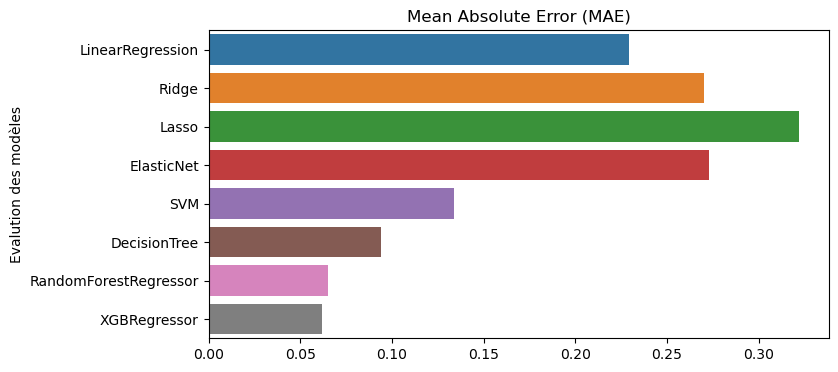

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Mean Absolute Error (MAE)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['MAE'].values.flatten(),
                 data=Model_result_gridSearch)


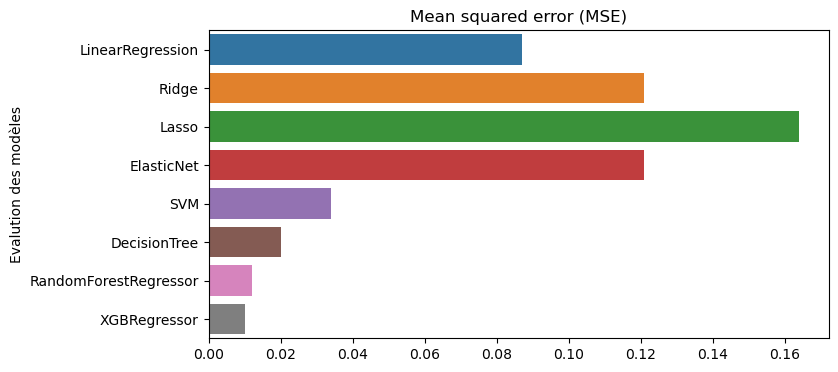

In [35]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Mean squared error (MSE)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['MSE'].values.flatten(),
                 data=Model_result_gridSearch)

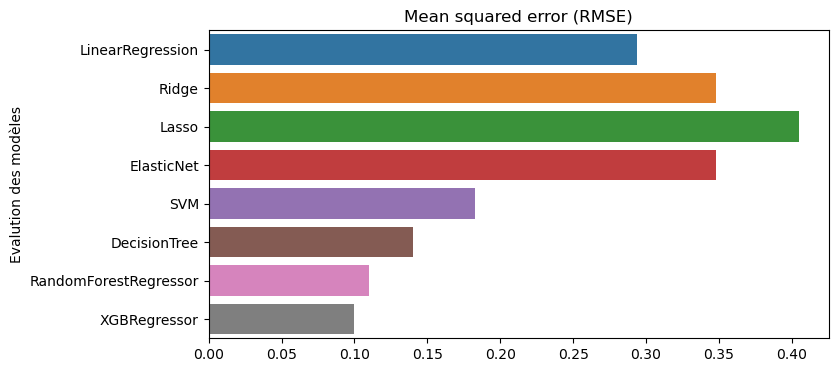

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Mean squared error (RMSE)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['RMSE'].values.flatten(),
                 data=Model_result_gridSearch)

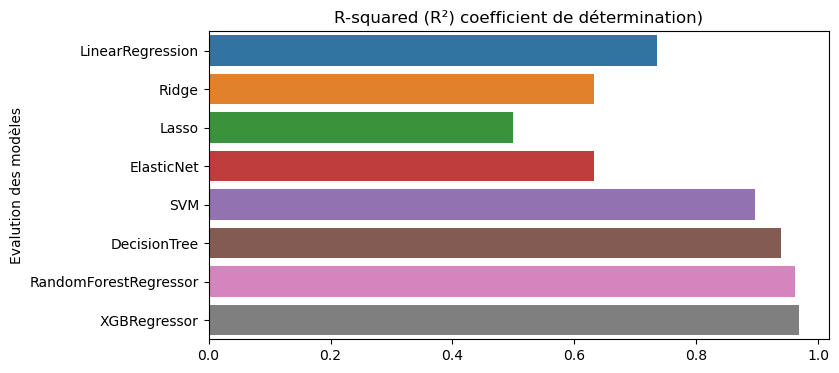

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("R-squared (R²) coefficient de détermination)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['R²'].values.flatten(),
                 data=Model_result_gridSearch)

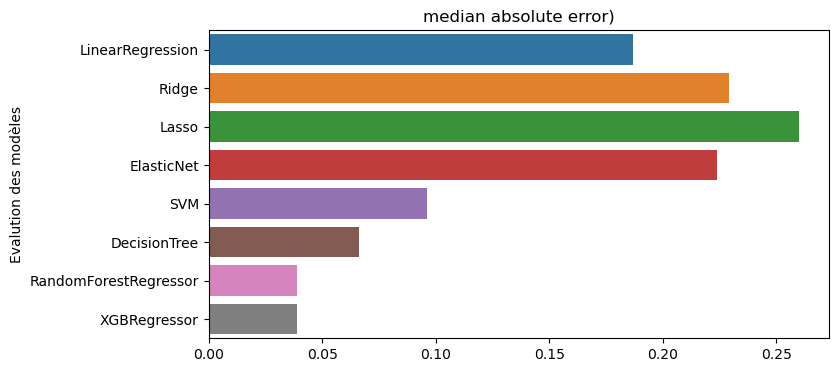

In [38]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("median absolute error)")
ax.set_ylabel("Evalution des modèles")
ax = sns.barplot(y=list(Model_result_gridSearch['model']),
                 x= Model_result_gridSearch['median abs err'].values.flatten(),
                 data=Model_result_gridSearch)


### Comparer les models avec best params

**RandomForestRegressor**
best params:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
RFR_result_gridSearch_best = []

parameters_RFR_best = {'n_estimators': [200],
                 'max_depth': [10],
                 'min_samples_split': [2],
                 'min_samples_leaf': [1],
                 'max_features': ['auto']}

RFR_gridSearch_best = GridSearchCV(RandomForestRegressor(), parameters_RFR_best, cv=5, n_jobs = 5)

RFR_gridSearch_best.fit(X_train, y_train.values.ravel())
y_pred_best = RFR_gridSearch_best.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_best).round(3)
mse = mean_squared_error(y_test,y_pred_best).round(3)
r_score = r2_score(y_test, y_pred_best, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_best)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_best).round(3)

RFR_result_gridSearch_best.append(['RandomForestRegressor',
                          RFR_gridSearch_best.best_score_.round(3),
                          RFR_gridSearch_best.cv_results_['mean_test_score'].round(3),
                          #RFR_gridSearch_best.cv_results_['mean_train_score'].round(3),
                          RFR_gridSearch_best.cv_results_['mean_score_time'].round(3),
                          RFR_gridSearch_best.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err])

RFR_best_result_gridSearch = pd.DataFrame(RFR_result_gridSearch_best,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
RFR_best_result_gridSearch

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,RandomForestRegressor,0.92,[0.92],[0.024],[1.377],0.064,0.011,0.107,0.965,0.04


**XGBRegressor**
best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}


In [40]:
XGB_result_gridSearch_best = []

parameters_XGB_best= {'learning_rate': [0.1],
                  'max_depth': [3],
                  'n_estimators': [300],
                  'min_child_weight': [5],
                  'gamma': [0]}


XGB_GridSearch_best = GridSearchCV(XGBRegressor(),parameters_XGB_best, cv=5, n_jobs = 5)
XGB_GridSearch_best.fit(X_train, y_train)
y_pred_best = XGB_GridSearch_best.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_best).round(3)
mse = mean_squared_error(y_test,y_pred_best).round(3)
r_score = r2_score(y_test, y_pred_best, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_best)).round(3)
med_abs_err = median_absolute_error(y_test,y_pred_best).round(3)
 
XGB_result_gridSearch_best.append(['XGBRegressor',
                          XGB_GridSearch_best.best_score_.round(3),
                          XGB_GridSearch_best.cv_results_['mean_test_score'].round(3),
                          XGB_GridSearch_best.cv_results_['mean_score_time'].round(3),
                          XGB_GridSearch_best.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err ])

XGB_best_result_gridSearch = pd.DataFrame(XGB_result_gridSearch_best,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
XGB_best_result_gridSearch

,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,XGBRegressor,0.954,[0.954],[0.005],[0.754],0.062,0.01,0.1,0.969,0.039


**SVR**

best params:  {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [41]:
SVR_result_gridSearch_best = []

parameters_SVR_best = [{'C': [10], 'gamma': ['scale'], 'kernel': ['rbf'], 'degree': [2], 'epsilon': [0.1]}]

SVR_gridSearch_best = GridSearchCV(SVR(), parameters_SVR_best, cv=5, n_jobs=5)

SVR_gridSearch_best.fit(X_train, y_train.values.ravel())
y_pred_best = SVR_gridSearch_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best).round(3)
mse = mean_squared_error(y_test, y_pred_best).round(3)
r_score = r2_score(y_test, y_pred_best, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best)).round(3)
med_abs_err = median_absolute_error(y_test, y_pred_best).round(3)

SVR_result_gridSearch_best.append(['SVR',
                                    SVR_gridSearch_best.best_score_.round(3),
                                    SVR_gridSearch_best.cv_results_['mean_test_score'].round(3),
                                    SVR_gridSearch_best.cv_results_['mean_score_time'].round(3),
                                    SVR_gridSearch_best.cv_results_['mean_fit_time'].round(3),
                                    mae, mse, rmse, r_score, med_abs_err])

SVR_best_result_gridSearch = pd.DataFrame(SVR_result_gridSearch_best, columns=['model', 'best score', 'mean_test_score', 'mean_score_time', 'mean_fit_time', 'MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
SVR_best_result_gridSearch


,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,SVR,0.852,[0.852],[0.065],[0.137],0.134,0.034,0.183,0.897,0.096


**ElasticNet**

best params:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 1000, 'normalize': False, 'selection': 'random', 'tol': 0.1}

In [42]:
EN_result_gridSearch_best = []

parameters_EN_best = [{'alpha': [0.1], 
                       'fit_intercept': [True], 
                       'l1_ratio': [0.25], 
                       'max_iter': [1000], 
                       'normalize': [False], 
                       'selection': ['random'], 
                       'tol': [0.1]}]

EN_gridSearch_best = GridSearchCV(ElasticNet(), parameters_EN_best, cv=5, n_jobs=5)

EN_gridSearch_best.fit(X_train, y_train.values.ravel())
y_pred_best = EN_gridSearch_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best).round(3)
mse = mean_squared_error(y_test, y_pred_best).round(3)
r_score = r2_score(y_test, y_pred_best, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best)).round(3)
med_abs_err = median_absolute_error(y_test, y_pred_best).round(3)

EN_result_gridSearch_best.append(['ElasticNet',
                                    EN_gridSearch_best.best_score_.round(3),
                                    EN_gridSearch_best.cv_results_['mean_test_score'].round(3),
                                    EN_gridSearch_best.cv_results_['mean_score_time'].round(3),
                                    EN_gridSearch_best.cv_results_['mean_fit_time'].round(3),
                                    mae, mse, rmse, r_score, med_abs_err])

EN_best_result_gridSearch = pd.DataFrame(EN_result_gridSearch_best, columns=['model', 'best score', 'mean_test_score', 'mean_score_time', 'mean_fit_time', 'MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
EN_best_result_gridSearch


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,ElasticNet,0.533,[0.533],[0.002],[0.005],0.272,0.12,0.347,0.633,0.221


In [43]:
best_result_gridSearch= pd.concat([RFR_best_result_gridSearch,XGB_best_result_gridSearch], join="outer",ignore_index=True,
                                            verify_integrity=True)
best_result_gridSearch

,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,ElasticNet,0.533,[0.533],[0.002],[0.005],0.272,0.120,0.347,0.633,0.221
1,RandomForestRegressor,0.920,[0.92],[0.024],[1.377],0.064,0.011,0.107,0.965,0.040
2,XGBRegressor,0.954,[0.954],[0.005],[0.754],0.062,0.010,0.100,0.969,0.039


### Test des modèles sélectionnés avec des best parameters et les métriques de scoring (R2, MAE,RMSE)¶

In [44]:
# Fonction d'évaluation des modèles de régression
def model_regression_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted")
    print("MAE: ",mae.round(5))
    print("RMSE: ", rmse)
    print("R²: ", r_score.round(5))

In [45]:
final_model_RFR = RFR_gridSearch_best.best_estimator_
final_model_XGB = XGB_GridSearch_best.best_estimator_

final_prediction_RFR = final_model_RFR.predict(X_test)
final_prediction_XGB = final_model_XGB.predict(X_test)
print('final model RandomForest')
model_regression_metrics(np.array(y_test), final_prediction_RFR)
print('-'*50)
print('final model XGBOOST')
model_regression_metrics(np.array(y_test), final_prediction_XGB)

final model RandomForest
MAE:  0.06449
RMSE:  0.34641016151377546
R²:  0.96502
--------------------------------------------------
final model XGBOOST
MAE:  0.06225
RMSE:  0.34641016151377546
R²:  0.96929


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


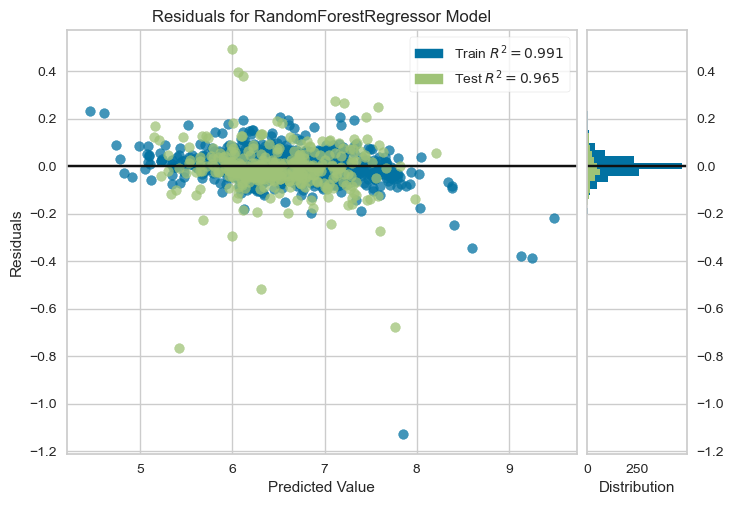

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = ResidualsPlot(final_model_RFR)
visualizer.fit(X_train, np.array(y_train).reshape(1324 ,)) 
visualizer.score(X_test, y_test)        
visualizer.show()            


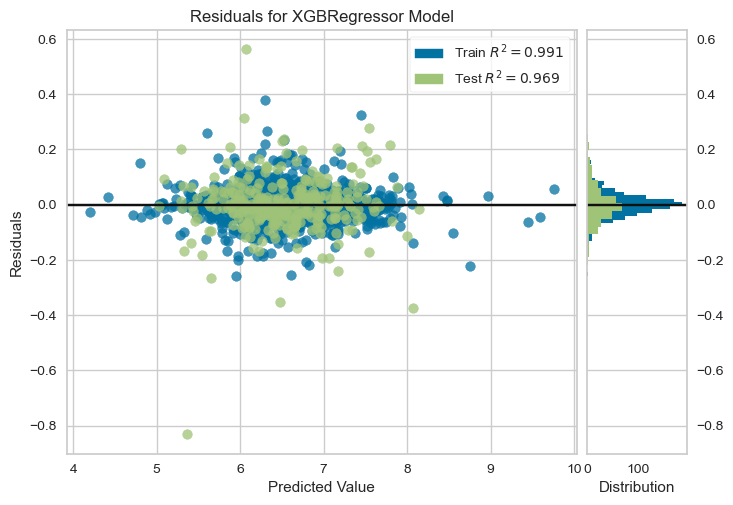

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
visualizer = ResidualsPlot(final_model_XGB)
visualizer.fit(X_train, np.array(y_train).reshape(1324,)) 
visualizer.score(X_test, y_test)        
visualizer.show() 

### Affichage des valeurs prédites vs valeurs réélles pour SiteEnergyUse(kBtu)

Nous allons vérifier la distribution des valaurs prédites en fonction des valeurs réélles :

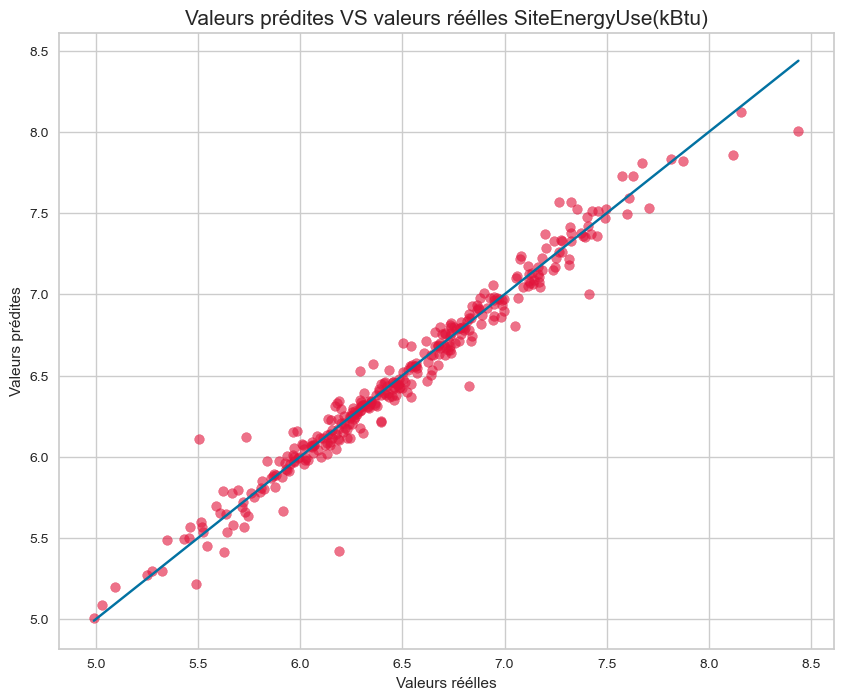

In [48]:
X_plot = [y_test.min(), y_test.max()]
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, color="#e1143b", alpha=.6)
plt.plot(X_plot, X_plot)
plt.xlabel("Valeurs réélles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs prédites VS valeurs réélles SiteEnergyUse(kBtu)", fontsize=15)
plt.show()

### la feature importance

L'importance de la fonctionnalité (importance variable) décrit les fonctionnalités pertinentes. Cela peut aider à mieux comprendre le problème résolu et parfois conduire à des améliorations du modèle en utilisant la sélection de fonctionnalités. je présenterai une façon de calculer l'importance des fonctionnalités pour l'algorithme Random Forest.

- Fonctionnalité Importance intégrée à l'algorithme xgboost




[17:47:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.



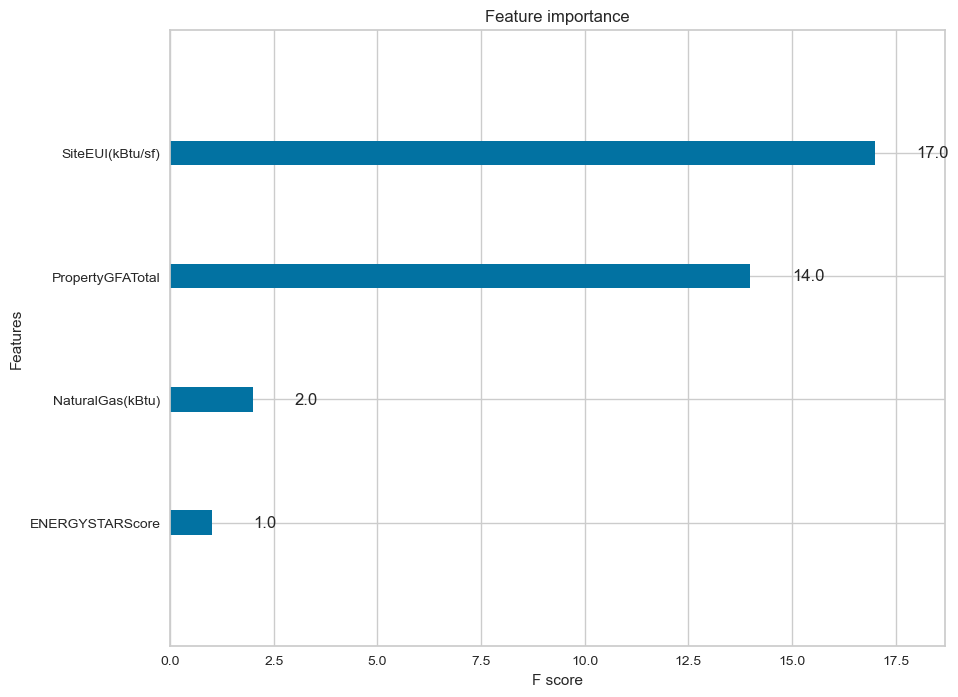

In [49]:
import xgboost as xgb
import matplotlib.pyplot as plt

# créer un DMatrix de xgboost pour les données d'entraînement
dtrain = xgb.DMatrix(X_train, label=y_train)

# entraîner un modèle xgboost en utilisant les mêmes hyperparamètres que votre modèle RFR_gridSearch_best
params = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
xgb_model = xgb.train(params, dtrain)

# afficher les feature_importances
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(xgb_model, ax=ax)
plt.show()


In [50]:
# Mesurer le temps d'exécution après l'entraînement du modèle
end_time = datetime.now()

# Calculer la durée de l'entraînement du modèle
training_time = end_time - start_time

# Afficher la durée de l'entraînement
print(f"Temps d'entraînement : {training_time}")

Temps d'entraînement : 0:26:30.653968


# Prédiction de SiteEnergyUse(kBtu) sans "ENERGY STAR SCORE"

In [51]:
X_train2 = X_train.drop('ENERGYSTARScore', axis = 1 )
X_test2 = X_test.drop('ENERGYSTARScore', axis = 1 )
y_train2 = y_train
y_test2 = y_test

# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", X_train2.shape)
print("Taille de l'ensemble de test :", X_test2.shape)

Taille de l'ensemble d'entraînement : (1324, 51)
Taille de l'ensemble de test : (332, 51)


In [52]:
results_model_2 = []
#parametres = []
for model_name, model in models.items():
        
    # Fit models
    model.fit(X_train2, y_train2)
    y_pred2 = model.predict(X_test2)
    
    # Evaluer les performances du modèles avec les métriques
    print(f"Evaluer la performance {model_name}...")
    mae = mean_absolute_error(y_test2, y_pred2).round(3)
    mse = mean_squared_error(y_test2, y_pred2).round(3)
    rmse = np.sqrt(mse).round(3)
    r_score = r2_score(y_test2, y_pred2, multioutput="variance_weighted").round(3)
    med_abs_err = median_absolute_error(y_test2,y_pred2).round(3)
    print("MAE = ", mae)        
    print("MSE = ", mse)
    print("RMSE = ",rmse)
    print("R² = ", r_score)
    print("median abs err = ", med_abs_err)
    print('-'*100)
    # Score model et  append model results dict avec valeurs
    results_model_2.append([model_name, mae, mse, rmse, r_score, med_abs_err])

Evaluer la performance Dummy Regressor...
MAE =  0.46
MSE =  0.338
RMSE =  0.581
R² =  -0.03
median abs err =  0.38
----------------------------------------------------------------------------------------------------
Evaluer la performance Ridge...
MAE =  0.23
MSE =  0.093
RMSE =  0.305
R² =  0.717
median abs err =  0.179
----------------------------------------------------------------------------------------------------
Evaluer la performance Lasso...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
----------------------------------------------------------------------------------------------------
Evaluer la performance DecisionTree...
MAE =  0.091
MSE =  0.018
RMSE =  0.134
R² =  0.944
median abs err =  0.057
----------------------------------------------------------------------------------------------------
Evaluer la performance ElasticNet...
MAE =  0.458
MSE =  0.328
RMSE =  0.573
R² =  -0.001
median abs err =  0.367
-----------------------------------

## Recherche des hyperparamètres avec GridSearchCV pour modéle 2

**Hyperparamètres pour le modèle random forest (modéle 2)**

In [53]:
results_gridSearch2 = []


# Recherche de la meilleure configuration d'hyperparamètre
parameters_RFR2 = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['auto', 'sqrt', 'log2']}

RFR_gridSearch2 = GridSearchCV(RandomForestRegressor(), parameters_RFR2, cv=5, n_jobs = 5)

RFR_gridSearch2.fit(X_train2, y_train2.values.ravel())
y_pred_RFR2 = RFR_gridSearch2.predict(X_test2)

print('Best score et params RandomForestRegressor')
print ("best score: ", RFR_gridSearch2.best_score_)
print("best params: ",RFR_gridSearch2.best_params_)
print('mean_fit_time :', RFR_gridSearch2.cv_results_['mean_fit_time'])
print('mean_score_time :', RFR_gridSearch2.cv_results_['mean_score_time'])
#print('mean_train_score :' , RFR_gridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',RFR_gridSearch2.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:")
mae2 = mean_absolute_error(y_test2,y_pred_RFR2).round(3)
mse2 = mean_squared_error(y_test2,y_pred_RFR2).round(3)
r_score2 = r2_score(y_test2, y_pred_RFR2, multioutput="variance_weighted").round(3)
rmse2 = np.sqrt(mean_squared_error(y_test2,y_pred_RFR2)).round(3)
med_abs_err2 = median_absolute_error(y_test2,y_pred_RFR2).round(3)
print("MAE = ",mae)
print("MSE = ", mse)
print("RMSE = ",rmse)
print("R² = ", r_score)
print("median abs err = ",med_abs_err)

results_gridSearch2.append(['RandomForestRegressor',
                          RFR_gridSearch2.best_score_,
                          RFR_gridSearch2.best_params_,
                          RFR_gridSearch2.cv_results_['mean_test_score'],
                          RFR_gridSearch2.cv_results_['mean_score_time'],
                          mae2, mse2, rmse2, r_score2, med_abs_err2])



C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best score et params RandomForestRegressor
best score:  0.923278490141483
best params:  {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
mean_fit_time : [0.79091339 1.56523623 2.37560058 0.65803933 1.29026141 1.97050343
 0.58783512 1.13739243 1.69064803 0.63624701 1.28365135 1.93663974
 0.63280396 1.25976796 1.87517247 0.5731276  1.09842319 1.6869525
 0.53362412 1.07286143 1.62072763 0.53548341 1.05997758 1.57736754
 0.51934109 1.03890514 1.56391783 0.31558003 0.64375949 0.97927346
 0.26764359 0.53776054 0.76795478 0.25287247 0.48101683 0.67649703
 0.24667969 0.49538913 0.76102996 0.23913169 0.48060818 0.73877091
 0.21084757 0.45159054 0.66462903 0.22389388 0.43642974 0.63172879
 0.21584225 0.43219032 0.62838235 0.20989509 0.41370697 0.62805309
 0.30059581 0.59673419 0.96741657 0.25532427 0.53400373 0.75676417
 0.22718129 0.45319476 0.65905714 0.23014894 0.4566452  0.6923974
 0.23016076 0.44668303 0.66042337 0.21625485 0.4178

best params:  {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
RFR_result_gridSearch_best2 = []

parameters_RFR_best2 = {'n_estimators': [100],
                 'max_depth': [15],
                 'min_samples_split': [2],
                 'min_samples_leaf': [1],
                 'max_features': ['auto']}

RFR_gridSearch_best2 = GridSearchCV(RandomForestRegressor(), parameters_RFR_best2, cv=5, n_jobs = 5)

RFR_gridSearch_best2.fit(X_train2, y_train2.values.ravel())
y_pred_best2 = RFR_gridSearch_best2.predict(X_test2)

mae = mean_absolute_error(y_test2,y_pred_best2).round(3)
mse = mean_squared_error(y_test2,y_pred_best2).round(3)
r_score = r2_score(y_test2, y_pred_best2, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test2,y_pred_best2)).round(3)
med_abs_err = median_absolute_error(y_test2,y_pred_best2).round(3)

RFR_result_gridSearch_best2.append(['RandomForestRegressor',
                          RFR_gridSearch_best2.best_score_.round(3),
                          RFR_gridSearch_best2.cv_results_['mean_test_score'].round(3),
                          #RFR_gridSearch_best.cv_results_['mean_train_score'].round(3),
                          RFR_gridSearch_best2.cv_results_['mean_score_time'].round(3),
                          RFR_gridSearch_best2.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err])

RFR_best_result_gridSearch2 = pd.DataFrame(RFR_result_gridSearch_best2,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
RFR_best_result_gridSearch2

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,RandomForestRegressor,0.918,[0.918],[0.019],[0.934],0.063,0.011,0.106,0.966,0.036


**Hyperparamètres pour le modèle xgboost (modéle 2)**

In [55]:
parameters_XGB2= {'learning_rate': [0.01, 0.1, 0.5, 1],
                  'max_depth': [3, 5, 7, 10],
                  'n_estimators': [100, 200, 300],
                  'min_child_weight': [1, 3, 5],
                  'gamma': [0, 0.1, 0.5, 1]}

XGB_GridSearch2 = GridSearchCV(XGBRegressor(),parameters_XGB2, cv=5, n_jobs = 5)
XGB_GridSearch2.fit(X_train2, y_train2)
y_pred_XGB2 = XGB_GridSearch2.predict(X_test2)
           

mae2 = mean_absolute_error(y_test2,y_pred_XGB2).round(3)
mse2 = mean_squared_error(y_test2,y_pred_XGB2).round(3)
r_score2 = r2_score(y_test2, y_pred_XGB2, multioutput="variance_weighted").round(3)
rmse2 = np.sqrt(mean_squared_error(y_test2,y_pred_XGB2)).round(3)
med_abs_err2 = median_absolute_error(y_test2,y_pred_XGB2).round(3)
print('Best score et params XGBRegressor ')
print ("best score: ", XGB_GridSearch2.best_score_)
print("best params: ",XGB_GridSearch2.best_params_)
print('mean_fit_time :', XGB_GridSearch2.cv_results_['mean_fit_time'])
print('mean_score_time :', XGB_GridSearch2.cv_results_['mean_score_time'])
#print('mean_train_score :' , XGB_GridSearch.cv_results_['mean_train_score'])
print('mean_test_score :',XGB_GridSearch2.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:"),
print("MAE = ",mae2)
print("MSE = ", mse2)
print("RMSE = ",rmse2)
print("R² = ", r_score2)
print("median abs err = ",med_abs_err2)

results_gridSearch2.append(['XGBRegressor',
                          XGB_GridSearch2.best_score_,
                          XGB_GridSearch2.best_params_,
                          XGB_GridSearch2.cv_results_['mean_test_score'],
                          XGB_GridSearch2.cv_results_['mean_score_time'],
                          mae2, mse2, rmse2, r_score2, med_abs_err2 ])

Best score et params XGBRegressor 
best score:  0.9437332008157501
best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
mean_fit_time : [0.26256824 0.4851275  0.75338135 0.25614748 0.50385332 0.73694973
 0.24768472 0.47944946 0.73784752 0.33404703 0.7458178  1.18549738
 0.39688268 0.7754426  1.17260394 0.36233721 0.73579497 1.12611904
 0.31898942 0.72613354 1.20995321 0.29799275 0.69916692 1.2385417
 0.36832504 0.76794024 1.27382107 0.30134339 0.71925855 1.24171185
 0.29157515 0.71499157 1.22839837 0.30853987 0.68737125 1.23994465
 0.25265532 0.56799469 0.9780858  0.34603982 0.58547573 0.98502693
 0.26018443 0.53191633 0.75878034 0.38153458 0.74749565 1.16448784
 0.40417109 0.77345338 1.14692874 0.35474329 0.75810452 1.20760913
 0.51736441 1.09472251 1.74268651 0.52498956 1.19111953 1.72859435
 0.54504223 1.03183174 1.51995835 0.60478063 1.3724977  1.86001143
 0.6003541  1.32718229 2.01553388 0.58774986 1.36656804 2.2315547
 0.268

best params:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}



In [56]:
XGB_result_gridSearch_best2 = []

parameters_XGB_best2= {'learning_rate': [0.1],
                  'max_depth': [3],
                  'n_estimators': [300],
                  'min_child_weight': [5],
                  'gamma': [0]}


XGB_GridSearch_best2 = GridSearchCV(XGBRegressor(),parameters_XGB_best2, cv=5, n_jobs = 5)
XGB_GridSearch_best2.fit(X_train2, y_train2)
y_pred_best2 = XGB_GridSearch_best2.predict(X_test2)

mae = mean_absolute_error(y_test2,y_pred_best2).round(3)
mse = mean_squared_error(y_test2,y_pred_best2).round(3)
r_score = r2_score(y_test2, y_pred_best2, multioutput="variance_weighted").round(3)
rmse = np.sqrt(mean_squared_error(y_test2,y_pred_best2)).round(3)
med_abs_err = median_absolute_error(y_test2,y_pred_best2).round(3)
 
XGB_result_gridSearch_best2.append(['XGBRegressor',
                          XGB_GridSearch_best2.best_score_.round(3),
                          XGB_GridSearch_best2.cv_results_['mean_test_score'].round(3),
                          XGB_GridSearch_best2.cv_results_['mean_score_time'].round(3),
                          XGB_GridSearch_best2.cv_results_['mean_fit_time'].round(3),
                          mae, mse, rmse, r_score, med_abs_err ])

XGB_best_result_gridSearch2 = pd.DataFrame(XGB_result_gridSearch_best2,columns=['model', 'best score', 'mean_test_score','mean_score_time', 'mean_fit_time','MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
XGB_best_result_gridSearch2



,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,XGBRegressor,0.944,[0.944],[0.005],[0.732],0.063,0.01,0.101,0.969,0.04


**Hyperparamètres pour le modèle ElasticNet (modéle 2)**

In [57]:
parameters_eNet = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.25, 0.5, 0.75],
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'tol': [0.001, 0.01, 0.1],
    'selection': ['cyclic', 'random']
}

eNet_GridSearch = GridSearchCV(ElasticNet(), parameters_eNet, cv=5, n_jobs=5)
eNet_GridSearch.fit(X_train2, y_train2)
y_pred_eNet = eNet_GridSearch.predict(X_test2)

mae_eNet = mean_absolute_error(y_test2, y_pred_eNet).round(3)
mse_eNet = mean_squared_error(y_test2, y_pred_eNet).round(3)
r_score_eNet = r2_score(y_test2, y_pred_eNet, multioutput="variance_weighted").round(3)
rmse_eNet = np.sqrt(mean_squared_error(y_test2, y_pred_eNet)).round(3)
med_abs_err_eNet = median_absolute_error(y_test2, y_pred_eNet).round(3)

print('Best score et params ElasticNet ')
print("best score: ", eNet_GridSearch.best_score_)
print("best params: ", eNet_GridSearch.best_params_)
print('mean_fit_time :', eNet_GridSearch.cv_results_['mean_fit_time'])
print('mean_score_time :', eNet_GridSearch.cv_results_['mean_score_time'])
print('mean_test_score :', eNet_GridSearch.cv_results_['mean_test_score'])
print('-'*50)
print("score de la prédiction:")
print("MAE = ", mae_eNet)
print("MSE = ", mse_eNet)
print("RMSE = ", rmse_eNet)
print("R² = ", r_score_eNet)
print("median abs err = ", med_abs_err_eNet)

results_gridSearch2.append(['ElasticNet',
                            eNet_GridSearch.best_score_,
                            eNet_GridSearch.best_params_,
                            eNet_GridSearch.cv_results_['mean_test_score'],
                            eNet_GridSearch.cv_results_['mean_score_time'],
                            mae_eNet, mse_eNet, rmse_eNet, r_score_eNet, med_abs_err_eNet])


Best score et params ElasticNet 
best score:  0.5150948244041735
best params:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 100, 'normalize': False, 'selection': 'random', 'tol': 0.1}
mean_fit_time : [0.00913019 0.00510402 0.00590162 0.00400348 0.00500145 0.00509377
 0.00386033 0.00379982 0.00359836 0.0036006  0.00380464 0.00385404
 0.00431852 0.00501461 0.00442505 0.00429664 0.00423613 0.00434275
 0.00350423 0.00394678 0.00344086 0.00353189 0.00379848 0.00379853
 0.00399957 0.00440021 0.00420041 0.00379634 0.00400448 0.00425344
 0.00420399 0.00360274 0.00347962 0.00360756 0.00407467 0.00300159
 0.00444884 0.00427494 0.00431395 0.00420794 0.00340242 0.00428305
 0.00370555 0.00340352 0.00320063 0.00388365 0.00340261 0.00350213
 0.00409431 0.00380211 0.00419693 0.0042028  0.0042974  0.00447354
 0.00360179 0.00349178 0.00389466 0.00420156 0.00369477 0.00340104
 0.00400338 0.00479641 0.00470786 0.00419846 0.00386457 0.00430326
 0.0034945  0.00409641 0.00388622 0.00346

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


best params:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 500, 'normalize': False, 'selection': 'random', 'tol': 0.1}


In [58]:
enet_params = {'alpha': [0.1], 'fit_intercept': [True],
               'l1_ratio': [0.25], 'max_iter': [500],
               'normalize': [False], 'selection': ['random'], 'tol': [0.1]}

enet_gridsearch = GridSearchCV(ElasticNet(), enet_params, cv=5, n_jobs=5)
enet_gridsearch.fit(X_train2, y_train2)

y_pred_enet = enet_gridsearch.predict(X_test2)

mae_enet = mean_absolute_error(y_test2, y_pred_enet).round(3)
mse_enet = mean_squared_error(y_test2, y_pred_enet).round(3)
r_score_enet = r2_score(y_test2, y_pred_enet, multioutput='variance_weighted').round(3)
rmse_enet = np.sqrt(mean_squared_error(y_test2, y_pred_enet)).round(3)
med_abs_err_enet = median_absolute_error(y_test2, y_pred_enet).round(3)

print('Best score et params ElasticNet')
print('best score: ', enet_gridsearch.best_score_)
print('best params: ', enet_gridsearch.best_params_)
print('mean_fit_time :', enet_gridsearch.cv_results_['mean_fit_time'])
print('mean_score_time :', enet_gridsearch.cv_results_['mean_score_time'])
print('mean_test_score :', enet_gridsearch.cv_results_['mean_test_score'])
print('-'*50)
print('score de la prédiction:')
print('MAE = ', mae_enet)
print('MSE = ', mse_enet)
print('RMSE = ', rmse_enet)
print('R² = ', r_score_enet)
print('median abs err = ', med_abs_err_enet)

results_gridsearch_enet = [['ElasticNet',
                            enet_gridsearch.best_score_,
                            enet_gridsearch.best_params_,
                            enet_gridsearch.cv_results_['mean_test_score'],
                            enet_gridsearch.cv_results_['mean_score_time'],
                            mae_enet, mse_enet, rmse_enet, r_score_enet, med_abs_err_enet]]
enet_best_results_gridsearch = pd.DataFrame(results_gridsearch_enet, columns=['model', 'best score', 'mean_test_score', 'mean_score_time', 'mean_fit_time', 'MAE', 'MSE', 'RMSE', 'R²', 'median abs err'])
enet_best_results_gridsearch


Best score et params ElasticNet
best score:  0.49982827186174406
best params:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 500, 'normalize': False, 'selection': 'random', 'tol': 0.1}
mean_fit_time : [0.00441465]
mean_score_time : [0.00220089]
mean_test_score : [0.49982827]
--------------------------------------------------
score de la prédiction:
MAE =  0.268
MSE =  0.122
RMSE =  0.349
R² =  0.628
median abs err =  0.215


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,model,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
0,ElasticNet,0.499828,"{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 500, 'normalize': False, 'selection': 'random', 'tol': 0.1}",[0.49982827186174406],[0.002200889587402344],0.268,0.122,0.349,0.628,0.215


**Sans score**

In [62]:
best_result_gridSearch2= pd.concat([RFR_best_result_gridSearch2, XGB_best_result_gridSearch2], join="outer",ignore_index=True,
                                            verify_integrity=True).set_index('model')
best_result_gridSearch2

,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
model,,,,,,,,,
RandomForestRegressor,0.918,[0.918],[0.019],[0.934],0.063,0.011,0.106,0.966,0.036
XGBRegressor,0.944,[0.944],[0.005],[0.732],0.063,0.010,0.101,0.969,0.040


**Avec score**

In [61]:
best_result_gridSearch.set_index('model')[1:]

,best score,mean_test_score,mean_score_time,mean_fit_time,MAE,MSE,RMSE,R²,median abs err
model,,,,,,,,,
RandomForestRegressor,0.920,[0.92],[0.024],[1.377],0.064,0.011,0.107,0.965,0.040
XGBRegressor,0.954,[0.954],[0.005],[0.754],0.062,0.010,0.100,0.969,0.039
